# Setting

## path setting 

In [30]:
### for local machine ###
import sys, os
home_path = os.path.expanduser("~") + '/Desktop/Molecular_kaggle'
sys.path.append(home_path + '/py/')

In [ ]:
### for kaggle kernel ###
import sys
sys.path.append('../usr/lib/boosting/')
sys.path.append('../usr/lib/based/')

## import module and my function

In [74]:
# module
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import scipy
# import pyper
import lightgbm
import xgboost
from tabulate import tabulate
# from ggplot import *
import warnings
import collections
from scipy.optimize import minimize
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #seabornライブラリを読み込み、スタイルをセットする
from numpy import linalg as la
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

# my module 
import importlib
import boosting
import based
importlib.reload(boosting)
importlib.reload(based)

# for instance
Process = based.Process()
Assistance = based.Assistance()
LightGBM = boosting.LightGBM()

## Read csv

In [3]:
### for local machine ###
train_df, test_df, features = Process.read_data()

# under sampling for testing
train_df = Assistance.test_sampling(train=train_df, key='type', rate=0.1)
train_df.head()

4658147 observations and 29 features in train set.
2505542 observations and 29 features in test set.
8 observations and 1 features in features set.


In [ ]:
### for Kaggle kernel ###
train_df = pd.read_csv("../input/preprocess/train.csv")
test_df = pd.read_csv('../input/preprocess/test.csv')
features = pd.read_csv('../input/preprocess/features.csv')

# check data frame
print("{} observations and {} features in train set.".format(train_df.shape[0],train_df.shape[1]))
print("{} observations and {} features in test set.".format(test_df.shape[0],test_df.shape[1]))
print("{} observations and {} features in features set.".format(features.shape[0],features.shape[1]))

features = features["feature"].tolist() # features list

# LightGBM

- lightgbm

## model execute

In [68]:
# parameters
param_lgb = {'metric': 'mae', # 評価関数
                     'objective':'regression_l2', # 目的関数
                     'max_depth': -1, # 各木の最大の深さ
                     'max_leaves': 255, # 各木の最大の葉の数
                     'min_data_in_leaf': 20, # 末端ノードに含まれる最小ノード数 (default)
                     'learning_rate': 0.15, # 各木の重み係数 (大きいと少ない木で予測する)
                     'boosting': 'gbdt', # (dart, rf)
                     'bagging_freq': 1, # バギングを行う割合 (1:常に行う, 0: 行わない)
                     'sub_feature':0.5, # 訓練データの??%を利用 (特徴量)
                     'sub_row':0.75, # 訓練データの??%を利用 (データ, 非復元抽出)
                     'verbosity': -1,
                     'nthread': 4,
                     'random_state': 831}

# argument
arg1 = {'train' : train_df,
            'test' : test_df,
            'features' : features,
            'param' : param_lgb,
            'name' : 'Lightgbm base model'}

In [70]:
# model
with based.timer("Light GBM model"):
        mean_log_mae, submit_file, importance = \
        Assistance.split_execute_model(split_value = 'type',
                                                         train=train_df, 
                                                         test=test_df, 
                                                         model=LightGBM.lightgbm, 
                                                         model_arg = arg1)

~~~~~~~~~ type name: 1JHC  ~~~~~~~~~
validation method: GroupKFold(n_splits=5) groups value: molecule_name
fold n°1
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 4.66439	valid_1's l1: 5.40285
Early stopping, best iteration is:
[63]	training's l1: 4.80031	valid_1's l1: 5.36821
fold n°2
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 4.65418	valid_1's l1: 5.50701
Early stopping, best iteration is:
[51]	training's l1: 4.86557	valid_1's l1: 5.43827
fold n°3
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 4.67777	valid_1's l1: 5.44836
Early stopping, best iteration is:
[59]	training's l1: 4.83885	valid_1's l1: 5.39517
fold n°4
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 4.67009	valid_1's l1: 5.42206
Early stopping, best iteration is:
[57]	training's l1: 4.83769	valid_1's l1: 5.36315
fold n°5
Training until validation scores don't improve for 1

## Result

In [71]:
# result (Mean Log MAE)
print("Lightgbm normal validation Mean log MAE: %.4f" % np.mean(mean_log_mae))
# submit
# Process.submit(submit_file ,tech = "lightgbm_giba_output")

Lightgbm normal validation Mean log MAE: 0.7768


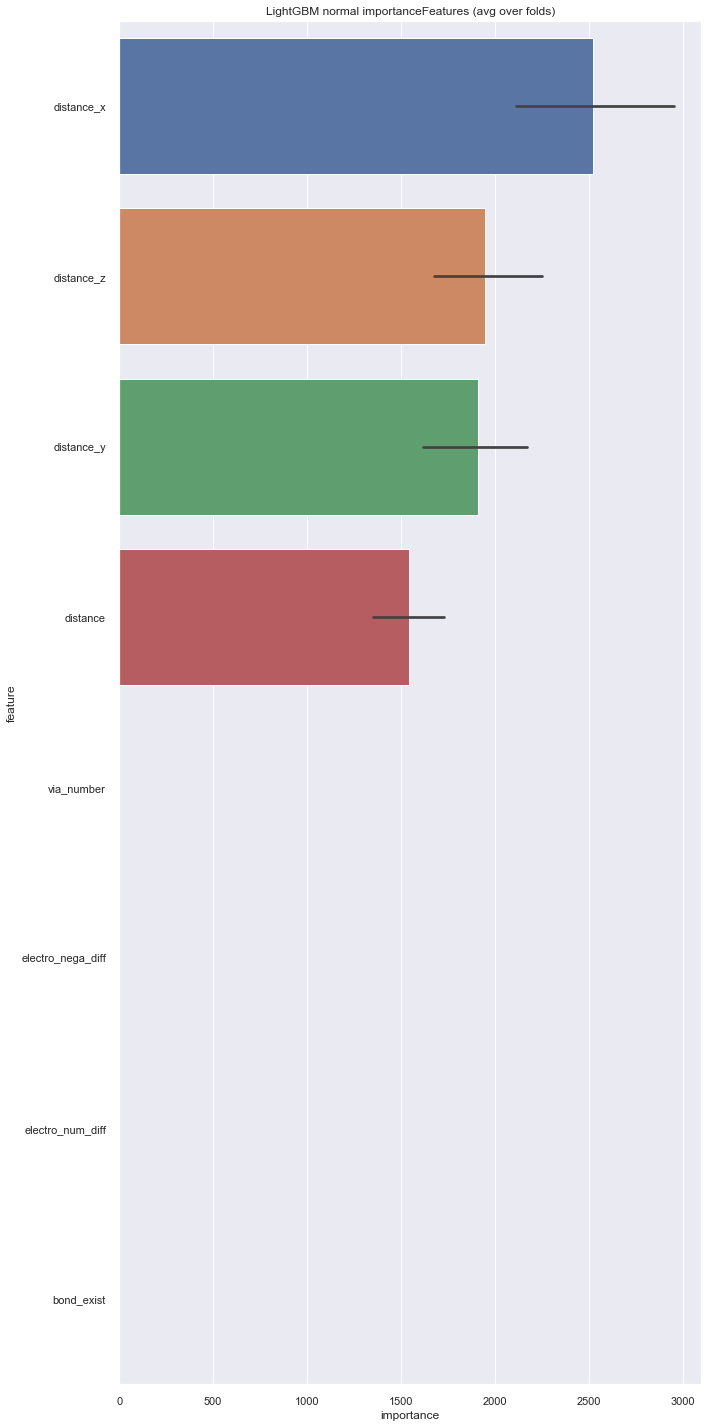

In [75]:
# importance  
Process.display_importances(importance,title="LightGBM normal importance",file_name = None)

In [ ]:
# output file
file_name =  'lightgbm_sample' + '_' + datetime.now().strftime("%Y%m%d") + ".csv"
submit_file.to_csv(file_name, index=False)